<a href="https://colab.research.google.com/github/LeaderSilver/hello-world/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))



Setup complete. Using torch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [4]:
!unzip ../mydata.zip

Archive:  ../mydata.zip
  inflating: mydata/class.yaml       
   creating: mydata/labels/
   creating: mydata/labels/downdog/
  inflating: mydata/labels/downdog/00000128.txt  
  inflating: mydata/labels/downdog/00000129.txt  
  inflating: mydata/labels/downdog/00000130.txt  
  inflating: mydata/labels/downdog/00000131.txt  
  inflating: mydata/labels/downdog/00000132.txt  
  inflating: mydata/labels/downdog/00000133.txt  
  inflating: mydata/labels/downdog/00000134.txt  
  inflating: mydata/labels/downdog/00000135.txt  
  inflating: mydata/labels/downdog/00000137.txt  
  inflating: mydata/labels/downdog/00000138.txt  
  inflating: mydata/labels/downdog/00000139.txt  
  inflating: mydata/labels/downdog/00000140.txt  
  inflating: mydata/labels/downdog/00000142.txt  
  inflating: mydata/labels/downdog/00000143.txt  
  inflating: mydata/labels/downdog/00000144.txt  
  inflating: mydata/labels/downdog/00000145.txt  
  inflating: mydata/labels/downdog/00000146.txt  
  inflating: mydata/labe

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 342MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 41.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 40.5ms
Speed: 0.5ms pre-process, 41.0ms inference, 115.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/d

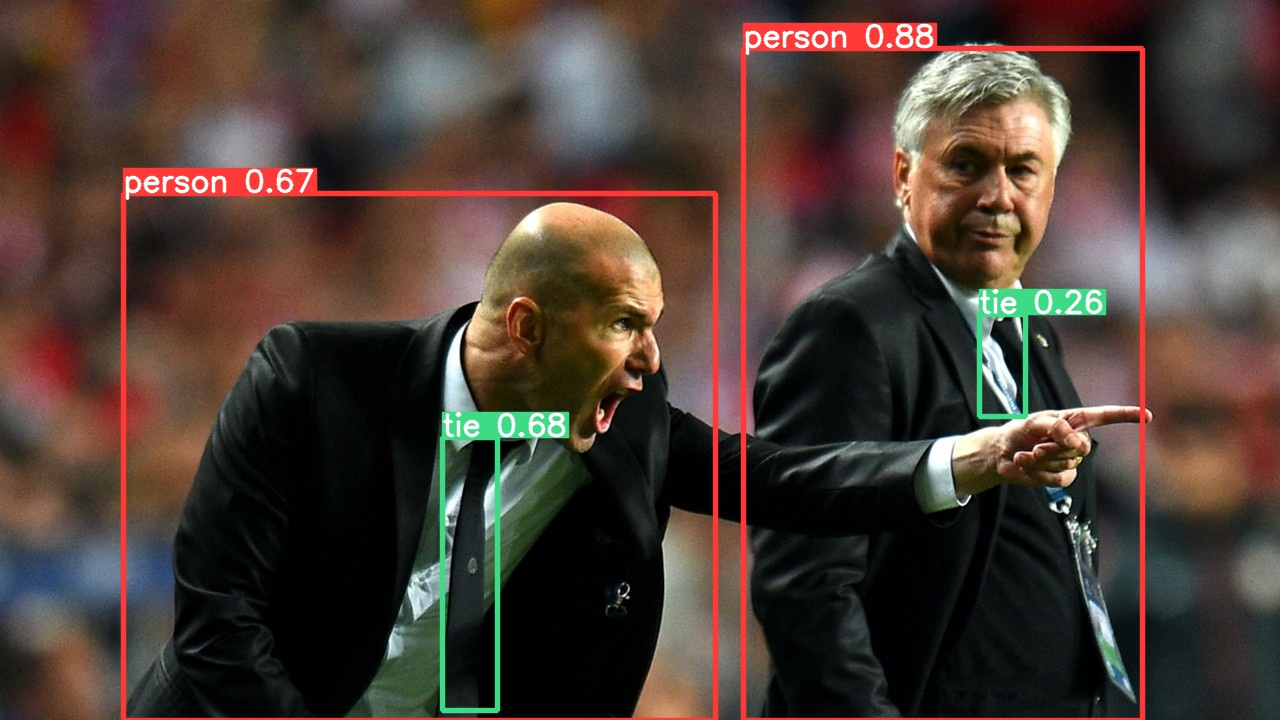

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)


In [12]:
!python train.py --img 640 --batch 50 --epochs 100 --data ../yolov5/mydata/class.yaml --weights yolov5s.pt --nosave --cache


train: weights=yolov5s.pt, cfg=, data=../yolov5/mydata/class.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=50, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=

detect: weights=['../yolov5/runs/train/exp7/weights/last.pt'], source=/content/00000047.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
libpng warning: iCCP: known incorrect sRGB profile
image 1/1 /content/00000047.jpg: 640x480 1 goddess, 39.5ms
Speed: 0.5ms pre-process, 39.5ms inference, 93.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


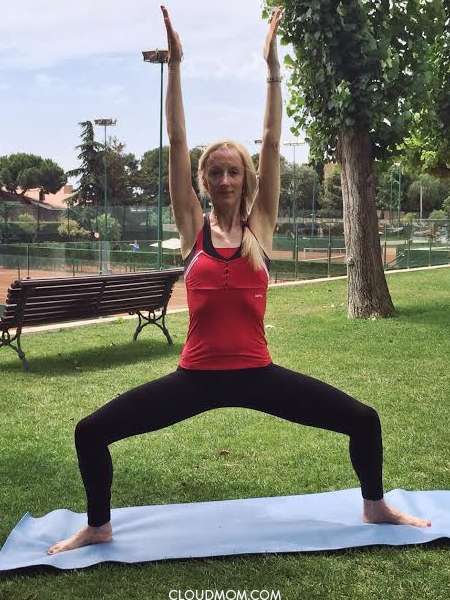

In [14]:
!python detect.py --weights ../yolov5/runs/train/exp7/weights/last.pt --img 640 --conf 0.25 --source /content/00000047.jpg
Image(filename='/content/00000047.jpg', width=600)
